<a href="https://colab.research.google.com/github/maddy2005/Finance_project/blob/main/Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
stocks = ['TCS.NS', 'INFY.NS', 'HDFCBANK.NS']



In [4]:
data = yf.download(stocks, start="2022-01-01", end="2024-01-01")['Close']
data.dropna(inplace=True)



/tmp/ipython-input-332854275.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2022-01-01", end="2024-01-01")['Close']
[*********************100%***********************]  3 of 3 completed


In [5]:
returns = data.pct_change()
returns.dropna(inplace=True)


In [6]:
weights = np.array([0.33, 0.33, 0.34])


In [7]:
portfolio_returns = returns.dot(weights)


In [8]:
portfolio_cum_returns = (1 + portfolio_returns).cumprod()
tcs_cum_returns = (1 + returns['TCS.NS']).cumprod()



In [9]:
portfolio_volatility = portfolio_returns.std() * np.sqrt(252)
tcs_volatility = returns['TCS.NS'].std() * np.sqrt(252)

print("Portfolio Volatility:", portfolio_volatility)
print("TCS Volatility:", tcs_volatility)


Portfolio Volatility: 0.18520136934998616
TCS Volatility: 0.20857638965653602


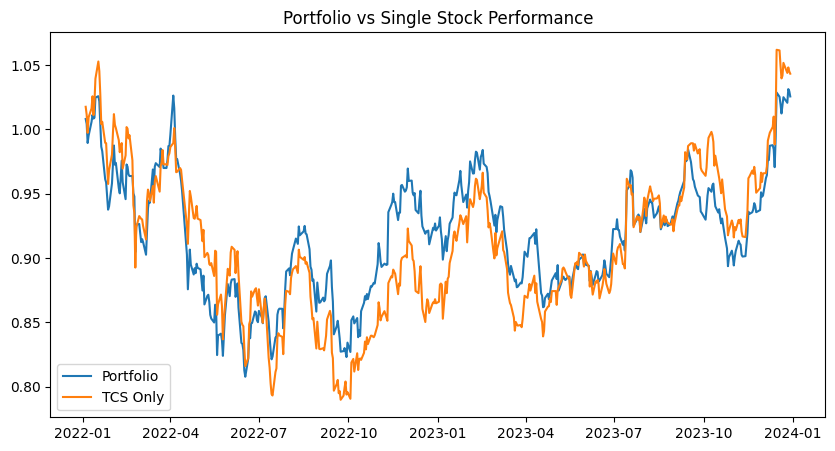

In [10]:
plt.figure(figsize=(10,5))
plt.plot(portfolio_cum_returns, label='Portfolio')
plt.plot(tcs_cum_returns, label='TCS Only')
plt.legend()
plt.title("Portfolio vs Single Stock Performance")
plt.show()
